In [1]:
import pandas as pd
import numpy as np
import os
import sys
import boto3
from dynamo import *
from utils import *
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorly.decomposition import non_negative_parafac
import tensorly as tl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
AWS_KEY = os.environ['AWS_KEY']
AWS_SECRET = os.environ['AWS_SECRET']

In [3]:
db = boto3.resource(service_name='dynamodb',
                    region_name='us-east-1',
                    aws_access_key_id=AWS_KEY,
                    aws_secret_access_key=AWS_SECRET)

In [4]:
sample_size=5

In [5]:

# bows = temporal_topic_extraction_whole_year(2019, sample_size, db, throttled=False)


bows = temporal_topic_extraction_whole_month(2019, 1, sample_size, db, throttled=False)


Checking for cached UIDs for 2019/1
No cached UIDs found for 2019/1 - Pulling from dynamodb........This may take a few moments
1.1.1000695
1.1.1022300
1.1.102288
1.1.1043669
1.1.104679
1.1.1070717
1.1.1079082
1.1.1090651
1.1.109657
1.1.1121844
1.1.1130284
1.1.1130325
1.1.1130337
1.1.1130361
1.1.1130384
1.1.1130402
1.1.1130420
1.1.1140495
1.1.1142246
1.1.11433
1.1.11489
1.1.1156907
1.1.1162788
1.1.117810
1.1.1192157
1.1.119247
1.1.1196258
1.1.119713
1.1.1197853
1.1.1199712
1.1.1206473
1.1.1210826
1.1.121594
1.1.122873
1.1.1248881
1.1.125286
1.1.1271781
1.1.127717
1.1.1279606
1.1.128625
1.1.1296187
1.1.1303598
1.1.1313717
1.1.133093
1.1.1334320
1.1.1349082
1.1.135402
1.1.1357969
1.1.1357982
1.1.1357986
1.1.13882
1.1.1394275
1.1.146257
1.1.1470952
1.1.1471023
1.1.1480559
1.1.1589177
1.1.1589183
1.1.1589217
1.1.1589235
1.1.1589237
1.1.1589241
1.1.1589247
1.1.1589248
1.1.1589249
1.1.1589250
1.1.1589252
1.1.1589254
1.1.1589257
1.1.1589259
1.1.1589260
1.1.1589263
1.1.1589264
1.1.1589265
1.1.1

1.12.687824
1.12.687827
1.12.687832
1.12.687836
1.12.687841
1.12.687847
1.12.687852
1.12.687855
1.12.687859
1.12.687864
1.12.687868
1.12.687872
1.12.687873
1.12.687880
1.12.687883
1.12.687890
1.12.687894
1.12.687899
1.12.687905
1.12.687910
1.12.687914
1.12.687922
1.12.687928
1.12.687932
1.12.687935
1.12.687941
1.12.687946
1.12.687952
1.12.687954
1.12.689531
1.12.69079
1.12.6911
1.12.695095
1.12.695126
1.12.716056
1.12.721348
1.12.723151
1.12.724240
1.12.72481
1.12.743240
1.12.751240
1.12.752831
1.12.769219
1.12.786234
1.12.78716
1.12.788872
1.12.789157
1.12.801750
1.12.803181
1.12.810062
1.12.813083
1.12.817677
1.12.825186
1.12.825504
1.12.82643
1.12.828162
1.12.831771
1.12.851989
1.12.86372
1.12.866639
1.12.871469
1.12.879998
1.12.883480
1.12.884773
1.12.894720
1.12.899138
1.12.924738
1.12.930884
1.12.935654
1.12.937790
1.12.93787
1.12.950630
1.12.96537
1.12.971969
1.12.996797
1.13.1000968
1.13.1000970
1.13.1000973
1.13.1000976
1.13.1000980
1.13.1000982
1.13.1000984
1.13.1000986
1.13.

1.15.471228
1.15.471773
1.15.47180
1.15.474579
1.15.47863
1.15.481149
1.15.482335
1.15.482543
1.15.482549
1.15.482573
1.15.482576
1.15.482606
1.15.482607
1.15.482636
1.15.482656
1.15.482684
1.15.482706
1.15.482792
1.15.482807
1.15.482811
1.15.482820
1.15.482821
1.15.482852
1.15.482877
1.15.482899
1.15.482920
1.15.482944
1.15.482946
1.15.482982
1.15.483056
1.15.483117
1.15.483160
1.15.483185
1.15.483199
1.15.483251
1.15.483255
1.15.483294
1.15.483323
1.15.483324
1.15.483344
1.15.483365
1.15.483368
1.15.483395
1.15.483425
1.15.483428
1.15.483469
1.15.483495
1.15.483505
1.15.483509
1.15.483563
1.15.483579
1.15.483590
1.15.483619
1.15.483620
1.15.483667
1.15.483671
1.15.483681
1.15.483693
1.15.483695
1.15.483697
1.15.483720
1.15.483736
1.15.483746
1.15.483810
1.15.483843
1.15.483895
1.15.483950
1.15.483966
1.15.483997
1.15.484261
1.15.491649
1.15.492269
1.15.496027
1.15.497439
1.15.497914
1.15.498000
1.15.498623
1.15.50012
1.15.507928
1.15.51045
1.15.51134
1.15.514375
1.15.515362
1.15.5175

1.18.10941
1.18.1098186
1.18.1098409
1.18.110848
1.18.1123450
1.18.1125993
1.18.1126878
1.18.1127298
1.18.1128079
1.18.1130517
1.18.1130667
1.18.1130681
1.18.1130682
1.18.1130684
1.18.1130689
1.18.1130704
1.18.1130712
1.18.1130720
1.18.1130727
1.18.1130744
1.18.1130754
1.18.1130769
1.18.1130771
1.18.1130779
1.18.1130791
1.18.1130799
1.18.1130800
1.18.1130801
1.18.1130809
1.18.1130824
1.18.1131294
1.18.1135277
1.18.1138234
1.18.114097
1.18.1141660
1.18.1142951
1.18.114613
1.18.1147263
1.18.1148336
1.18.1148434
1.18.115030
1.18.1151001
1.18.1151467
1.18.1151799
1.18.1152752
1.18.1156270
1.18.1157697
1.18.1160056
1.18.1160414
1.18.1160621
1.18.1160806
1.18.1162750
1.18.1163765
1.18.1165138
1.18.1166820
1.18.1167049
1.18.1170560
1.18.1172753
1.18.1173920
1.18.1174623
1.18.1179015
1.18.1181153
1.18.1181538
1.18.1181905
1.18.1188193
1.18.118870
1.18.1190784
1.18.1195347
1.18.1198654
1.18.119970
1.18.12008
1.18.12027
1.18.1203203
1.18.1205977
1.18.120632
1.18.1211912
1.18.121278
1.18.1216982


1.20.563719
1.20.56492
1.20.570109
1.20.574035
1.20.576239
1.20.582508
1.20.598473
1.20.614308
1.20.646563
1.20.662131
1.20.6625
1.20.667031
1.20.67378
1.20.674450
1.20.678427
1.20.68576
1.20.687695
1.20.688505
1.20.691976
1.20.693480
1.20.719015
1.20.721194
1.20.727208
1.20.735280
1.20.741564
1.20.752123
1.20.756610
1.20.762168
1.20.76240
1.20.767020
1.20.768110
1.20.77688
1.20.778219
1.20.785737
1.20.78684
1.20.793939
1.20.795203
1.20.80216
1.20.802887
1.20.803696
1.20.808765
1.20.808815
1.20.813268
1.20.816286
1.20.823074
1.20.827514
1.20.865974
1.20.87365
1.20.88165
1.20.883263
1.20.901755
1.20.909423
1.20.930191
1.20.933899
1.20.937163
1.20.939872
1.20.941254
1.20.941370
1.20.96330
1.20.96570
1.20.96775
1.20.970368
1.20.973697
1.20.982646
1.20.989527
1.21.1000501
1.21.1002605
1.21.1002606
1.21.1002609
1.21.1002611
1.21.1002612
1.21.1002613
1.21.1002615
1.21.1002620
1.21.1002622
1.21.1002625
1.21.1002629
1.21.1002631
1.21.1002634
1.21.1002637
1.21.1002639
1.21.1002641
1.21.1002642


1.23.563794
1.23.563795
1.23.563796
1.23.563798
1.23.563800
1.23.563801
1.23.563802
1.23.563803
1.23.563804
1.23.563805
1.23.563806
1.23.563807
1.23.563809
1.23.563810
1.23.563812
1.23.563813
1.23.563814
1.23.563815
1.23.563816
1.23.563818
1.23.563820
1.23.563821
1.23.563822
1.23.563824
1.23.563825
1.23.563826
1.23.563827
1.23.563828
1.23.563830
1.23.563832
1.23.563833
1.23.563834
1.23.56605
1.23.56943
1.23.570002
1.23.570710
1.23.572441
1.23.574189
1.23.574488
1.23.576190
1.23.577213
1.23.577763
1.23.578454
1.23.57913
1.23.579644
1.23.580675
1.23.582657
1.23.583302
1.23.584688
1.23.5864
1.23.586901
1.23.586961
1.23.587227
1.23.588220
1.23.588300
1.23.588998
1.23.59129
1.23.591894
1.23.592931
1.23.592974
1.23.593672
1.23.593693
1.23.594011
1.23.595309
1.23.595471
1.23.596640
1.23.600596
1.23.600697
1.23.601339
1.23.605041
1.23.6051
1.23.605226
1.23.605885
1.23.60629
1.23.606896
1.23.609109
1.23.609744
1.23.609855
1.23.610402
1.23.611062
1.23.611150
1.23.611644
1.23.61265
1.23.612850
1.

1.26.245227
1.26.245520
1.26.24863
1.26.2578495
1.26.261975
1.26.271301
1.26.271473
1.26.285044
1.26.308702
1.26.31680
1.26.32400
1.26.345219
1.26.34765
1.26.355869
1.26.358335
1.26.358414
1.26.358455
1.26.358481
1.26.358495
1.26.358687
1.26.358689
1.26.358868
1.26.358882
1.26.358998
1.26.359014
1.26.359031
1.26.359071
1.26.359076
1.26.359212
1.26.359245
1.26.359340
1.26.359470
1.26.359495
1.26.359546
1.26.359551
1.26.359579
1.26.359610
1.26.359612
1.26.359803
1.26.359830
1.26.359907
1.26.359908
1.26.359919
1.26.360255
1.26.36712
1.26.37444
1.26.3865
1.26.411663
1.26.416509
1.26.426999
1.26.428076
1.26.463831
1.26.46424
1.26.467293
1.26.482633
1.26.482893
1.26.482993
1.26.483004
1.26.483163
1.26.483196
1.26.483236
1.26.483261
1.26.483269
1.26.483360
1.26.483462
1.26.483524
1.26.483636
1.26.483713
1.26.483792
1.26.483835
1.26.483944
1.26.488726
1.26.498485
1.26.509620
1.26.521624
1.26.525283
1.26.52647
1.26.52660
1.26.540844
1.26.54424
1.26.562191
1.26.563930
1.26.563931
1.26.563933
1.2

1.29.827469
1.29.833331
1.29.835813
1.29.835843
1.29.836604
1.29.836627
1.29.838926
1.29.840798
1.29.84159
1.29.8427
1.29.845333
1.29.845479
1.29.845707
1.29.846970
1.29.847407
1.29.848720
1.29.850032
1.29.850549
1.29.85182
1.29.85317
1.29.85448
1.29.862914
1.29.863033
1.29.863158
1.29.864831
1.29.867421
1.29.869424
1.29.869916
1.29.871898
1.29.873576
1.29.87452
1.29.874840
1.29.87797
1.29.879595
1.29.880217
1.29.880283
1.29.880474
1.29.88063
1.29.884469
1.29.886085
1.29.886659
1.29.887872
1.29.89181
1.29.892725
1.29.892825
1.29.89298
1.29.895207
1.29.895590
1.29.899577
1.29.900534
1.29.90378
1.29.903997
1.29.911456
1.29.911988
1.29.916166
1.29.91983
1.29.921609
1.29.922308
1.29.92718
1.29.927185
1.29.927465
1.29.927479
1.29.927610
1.29.928456
1.29.92940
1.29.931925
1.29.931941
1.29.932794
1.29.936586
1.29.939952
1.29.940454
1.29.94089
1.29.940917
1.29.942500
1.29.94329
1.29.94462
1.29.948329
1.29.949895
1.29.951999
1.29.95926
1.29.965903
1.29.96629
1.29.966373
1.29.966567
1.29.967755


1.31.1815987
1.31.1816080
1.31.1816119
1.31.1816237
1.31.1816832
1.31.1816962
1.31.1817085
1.31.1817329
1.31.1817341
1.31.1817359
1.31.1817535
1.31.1817665
1.31.1818072
1.31.1818235
1.31.1818335
1.31.1818392
1.31.1818458
1.31.1818547
1.31.1818742
1.31.1819132
1.31.1819240
1.31.1819275
1.31.1819298
1.31.1819567
1.31.1819801
1.31.1820139
1.31.1820194
1.31.1820595
1.31.1820686
1.31.1820897
1.31.1821225
1.31.1821317
1.31.1821484
1.31.1821773
1.31.1821796
1.31.1822064
1.31.1822161
1.31.1822307
1.31.1822382
1.31.1822768
1.31.1823419
1.31.1823921
1.31.1824651
1.31.1824720
1.31.1824949
1.31.1824982
1.31.1824983
1.31.1825237
1.31.1825265
1.31.1825503
1.31.1825504
1.31.1825555
1.31.1825603
1.31.1825746
1.31.1825764
1.31.1825893
1.31.1826132
1.31.1826333
1.31.1826714
1.31.1827105
1.31.1827591
1.31.1827673
1.31.1827816
1.31.1828170
1.31.1828189
1.31.1828674
1.31.1829015
1.31.182995
1.31.183000
1.31.1830325
1.31.1830504
1.31.1830872
1.31.1830889
1.31.1831058
1.31.1831169
1.31.1831612
1.31.1831666
1

1.7.1808273
1.7.1808670
1.7.1809268
1.7.1809569
1.7.1810827
1.7.1810991
1.7.1811200
1.7.1811294
1.7.1811414
1.7.181169
1.7.1811733
1.7.1811957
1.7.1812734
1.7.1812987
1.7.1813068
1.7.1813140
1.7.1813513
1.7.1813534
1.7.1813604
1.7.1813912
1.7.1815407
1.7.1815748
1.7.1815807
1.7.1816114
1.7.1816906
1.7.1817297
1.7.1817962
1.7.1818004
1.7.1818290
1.7.1818586
1.7.1819010
1.7.1819568
1.7.1819603
1.7.1819949
1.7.1820089
1.7.1820243
1.7.1820296
1.7.1820641
1.7.1820904
1.7.1821034
1.7.1821615
1.7.1821949
1.7.1822073
1.7.1822499
1.7.1823107
1.7.1823491
1.7.1823603
1.7.1823758
1.7.1823806
1.7.1825095
1.7.1825182
1.7.1825371
1.7.1826889
1.7.1827000
1.7.1828011
1.7.182858
1.7.1828655
1.7.1828790
1.7.1829129
1.7.1829708
1.7.1830181
1.7.1830347
1.7.1830989
1.7.1831241
1.7.1831685
1.7.1831780
1.7.1832764
1.7.1832813
1.7.1833065
1.7.1833432
1.7.1834507
1.7.1834794
1.7.1835291
1.7.1836519
1.7.1836612
1.7.1837251
1.7.1837782
1.7.1837873
1.7.1838144
1.7.1839267
1.7.1839771
1.7.1840137
1.7.1840644
1.7.18

1.9.563327
1.9.563328
1.9.563329
1.9.563330
1.9.563331
1.9.563332
1.9.563333
1.9.563335
1.9.563337
1.9.563339
1.9.563340
1.9.563341
1.9.563343
1.9.563344
1.9.563345
1.9.563346
1.9.563347
1.9.563348
1.9.563349
1.9.563351
1.9.563352
1.9.563353
1.9.563354
1.9.563355
1.9.563356
1.9.563358
1.9.563360
1.9.563361
1.9.563362
1.9.563363
1.9.563364
1.9.563366
1.9.563368
1.9.563369
1.9.563370
1.9.563371
1.9.563372
1.9.563374
1.9.563375
1.9.563376
1.9.563919
1.9.570805
1.9.572008
1.9.57328
1.9.573757
1.9.575170
1.9.578180
1.9.578429
1.9.57955
1.9.581131
1.9.583349
1.9.585634
1.9.58621
1.9.586755
1.9.588035
1.9.58952
1.9.589989
1.9.590079
1.9.590837
1.9.59103
1.9.591554
1.9.592618
1.9.59371
1.9.594085
1.9.596305
1.9.596866
1.9.598779
1.9.599535
1.9.602144
1.9.602534
1.9.603700
1.9.603722
1.9.604209
1.9.606006
1.9.606532
1.9.606545
1.9.607236
1.9.607578
1.9.607954
1.9.609297
1.9.610717
1.9.6110
1.9.611377
1.9.613453
1.9.613877
1.9.61429
1.9.614780
1.9.614851
1.9.616668
1.9.616793
1.9.617564
1.9.6181

Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs
Flushing Queue pipes for UIDs


In [6]:
b = [' '.join(y) for x in bows for y in x]

In [8]:
vectorizer = TfidfVectorizer(max_features=10000)
X = np.array(vectorizer.fit_transform(b).todense()).astype(np.float32)


In [9]:
t = np.dstack([X[i*sample_size:(i+1)*sample_size] for i in range(31)]).transpose(1,0,2)

In [10]:
w,f = non_negative_parafac(tensor=tl.tensor(t), rank=5, n_iter_max=10000)

In [11]:
def plotit3(array, title, yaxis=None, xaxis=None, ylabel=None, xlabel=None):
    plt.figure(figsize=(15,8))
    sns.heatmap(array, cmap='Blues')
    plt.title(title)
    if yaxis:
        plt.yticks(range(len(yaxis)),yaxis, rotation=0)
    if xaxis:
        plt.xticks(xaxis)
    if ylabel:
        plt.ylabel(ylabel)
    if xlabel:
        plt.xlabel(xlabel)
    plt.show()

In [12]:
# function to convert the most important vectorized terms back to words
def get_topics(array, threshold, vectorizer):
    
    #extract the location of the highest values above threshold sorted highest to lowest
    top_words = sorted(np.argwhere(array > threshold).ravel().tolist(), reverse=True)
    
    #convert back to words and return
    return np.array(vectorizer.get_feature_names())[top_words]

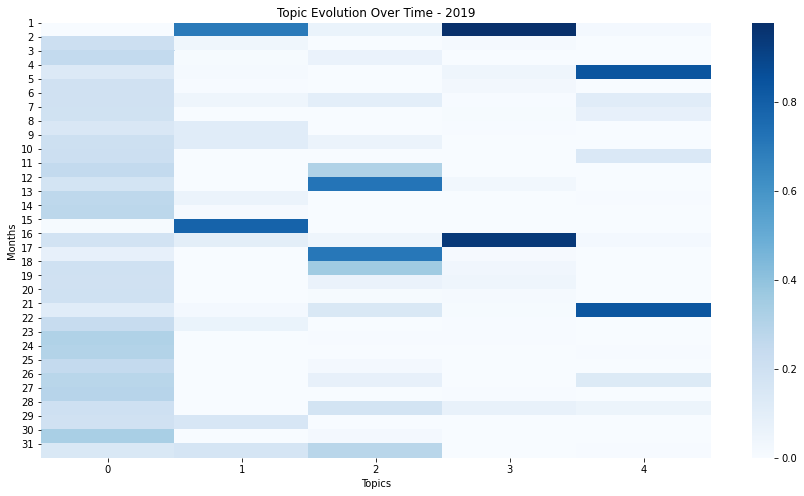

In [14]:
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = list(range(1,32))
plotit3(f[2], 'Topic Evolution Over Time - {}'.format(2019), yaxis=months, ylabel='Months', xlabel='Topics')

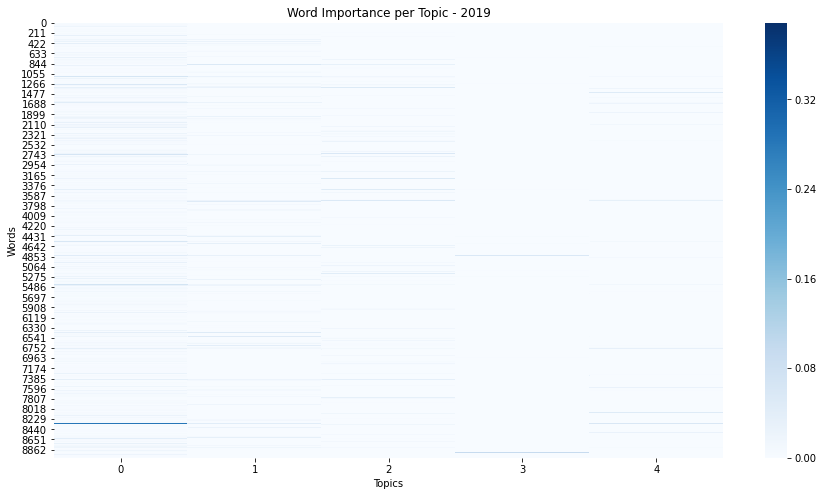

In [15]:
#visualize word importance per topic - should be mode-1 matrix
plotit3(f[0], 'Word Importance per Topic - {}'.format(2019), ylabel='Words', xlabel='Topics')

In [18]:
#get the words for each topic
words_per_topic = [get_topics(f[0][:,i], 0.08, vectorizer) for i in range(5)]
for pos, topic in enumerate(words_per_topic):
    print('\nTopic {}: {}'.format(pos, topic))


Topic 0: ['year' 'world' 'work' 'white' 'wall' 'two' 'trump' 'time' 'tell' 'take'
 'state' 'shutdown' 'see' 'republican' 'report' 'president' 'poll'
 'people' 'one' 'new' 'million' 'make' 'last' 'house' 'hill' 'government'
 'fund' 'first' 'end' 'democrat' 'deal' 'company' 'border']

Topic 1: ['video' 'trade' 'show' 'samsung' 'people' 'ocasiocortez' 'movie' 'madden'
 'hfpa' 'golden' 'globe' 'frankel' 'fish' 'district' 'bustos' 'award'
 'apple']

Topic 2: ['trade' 'stock' 'spot' 'singapore' 'rise' 'rate' 'price' 'percent' 'per'
 'ounce' 'market' 'low' 'investor' 'high' 'gold' 'global' 'gain' 'economy'
 'economic' 'data' 'bank']

Topic 3: ['year' 'workplace' 'woman' 'witherspoon' 'video' 'tuesday' 'time'
 'theater' 'systemic' 'statistics' 'sexual' 'release' 'reese' 'raise'
 'powerful' 'people' 'notable' 'misconduct' 'lowincome' 'legal'
 'interview' 'instance' 'headline' 'harassment' 'gofundme' 'fund'
 'entertainment' 'defense' 'creation' 'country' 'contact' 'compilation'
 'celebrate' 'as

In [22]:
a = load_cached_uid_days(2019, 1,4)
print(len(a))

0


In [25]:
data = np.load(r'/home/scott/topic_analysis/2019/jan/uid.npy')

In [30]:
for x in data:
    print(x)

1.1.1000695
1.1.1022300
1.1.102288
1.1.1043669
1.1.104679
1.1.1070717
1.1.1079082
1.1.1090651
1.1.109657
1.1.1121844
1.1.1130284
1.1.1130325
1.1.1130337
1.1.1130361
1.1.1130384
1.1.1130402
1.1.1130420
1.1.1140495
1.1.1142246
1.1.11433
1.1.11489
1.1.1156907
1.1.1162788
1.1.117810
1.1.1192157
1.1.119247
1.1.1196258
1.1.119713
1.1.1197853
1.1.1199712
1.1.1206473
1.1.1210826
1.1.121594
1.1.122873
1.1.1248881
1.1.125286
1.1.1271781
1.1.127717
1.1.1279606
1.1.128625
1.1.1296187
1.1.1303598
1.1.1313717
1.1.133093
1.1.1334320
1.1.1349082
1.1.135402
1.1.1357969
1.1.1357982
1.1.1357986
1.1.13882
1.1.1394275
1.1.146257
1.1.1470952
1.1.1471023
1.1.1480559
1.1.1589177
1.1.1589183
1.1.1589217
1.1.1589235
1.1.1589237
1.1.1589241
1.1.1589247
1.1.1589248
1.1.1589249
1.1.1589250
1.1.1589252
1.1.1589254
1.1.1589257
1.1.1589259
1.1.1589260
1.1.1589263
1.1.1589264
1.1.1589265
1.1.1589330
1.1.1589343
1.1.1589429
1.1.1589473
1.1.1590789
1.1.1591011
1.1.1599150
1.1.1622485
1.1.162317
1.1.1624528
1.1.164010
1.

1.12.194977
1.12.195189
1.12.197063
1.12.197517
1.12.199328
1.12.202670
1.12.203152
1.12.204346
1.12.212846
1.12.2129917
1.12.2130074
1.12.2130109
1.12.2130325
1.12.2130621
1.12.2130712
1.12.2130840
1.12.2130935
1.12.2131042
1.12.2131057
1.12.2131119
1.12.2131216
1.12.2131319
1.12.2131338
1.12.2131436
1.12.2131514
1.12.2131571
1.12.2131629
1.12.2131665
1.12.2131696
1.12.2131785
1.12.2131801
1.12.2131803
1.12.2131822
1.12.2131848
1.12.2131996
1.12.2132012
1.12.2132140
1.12.2132170
1.12.2132404
1.12.2132476
1.12.2132491
1.12.2132568
1.12.2132605
1.12.2132637
1.12.2132639
1.12.2132645
1.12.2132760
1.12.2132800
1.12.2132976
1.12.2133029
1.12.2133100
1.12.2133155
1.12.2133178
1.12.2133194
1.12.2133249
1.12.2133318
1.12.2133322
1.12.2133331
1.12.2133341
1.12.2133357
1.12.2133456
1.12.2133478
1.12.2133482
1.12.2133505
1.12.2133636
1.12.2133671
1.12.2133699
1.12.2133722
1.12.2133733
1.12.2133818
1.12.2133824
1.12.2133888
1.12.2134031
1.12.2134103
1.12.2134122
1.12.2134139
1.12.2134162
1.12.213

1.15.563564
1.15.563566
1.15.563594
1.15.567063
1.15.57124
1.15.57237
1.15.572808
1.15.573819
1.15.576925
1.15.580102
1.15.581343
1.15.583416
1.15.585502
1.15.586334
1.15.586506
1.15.586834
1.15.587104
1.15.587243
1.15.587753
1.15.587887
1.15.588244
1.15.58902
1.15.589187
1.15.589407
1.15.589614
1.15.591173
1.15.591272
1.15.591686
1.15.592090
1.15.595348
1.15.595702
1.15.596863
1.15.596988
1.15.599916
1.15.60036
1.15.601517
1.15.603046
1.15.603491
1.15.60710
1.15.607342
1.15.607515
1.15.608249
1.15.609178
1.15.610300
1.15.61038
1.15.611244
1.15.612509
1.15.612671
1.15.612904
1.15.613946
1.15.614390
1.15.620023
1.15.622514
1.15.623207
1.15.623308
1.15.627702
1.15.628668
1.15.630257
1.15.631179
1.15.632308
1.15.63319
1.15.63782
1.15.638772
1.15.638814
1.15.639294
1.15.643553
1.15.643804
1.15.644907
1.15.64886
1.15.652812
1.15.65327
1.15.653395
1.15.653400
1.15.654343
1.15.659241
1.15.660006
1.15.66056
1.15.662993
1.15.663064
1.15.668081
1.15.669726
1.15.671006
1.15.677279
1.15.67810
1.15

1.17.575176
1.17.57595
1.17.576378
1.17.576544
1.17.576724
1.17.579334
1.17.579504
1.17.579756
1.17.580573
1.17.585003
1.17.586340
1.17.587074
1.17.587588
1.17.588128
1.17.588537
1.17.588665
1.17.588667
1.17.58899
1.17.589090
1.17.590748
1.17.590961
1.17.591487
1.17.592012
1.17.594485
1.17.595311
1.17.59555
1.17.596689
1.17.597186
1.17.597280
1.17.597408
1.17.598323
1.17.598555
1.17.598797
1.17.599937
1.17.600460
1.17.600582
1.17.601306
1.17.6017
1.17.602172
1.17.602229
1.17.602264
1.17.603821
1.17.604079
1.17.604393
1.17.60594
1.17.606279
1.17.608453
1.17.609751
1.17.611058
1.17.611094
1.17.611945
1.17.612786
1.17.612811
1.17.613609
1.17.614366
1.17.616210
1.17.616319
1.17.617116
1.17.617538
1.17.617916
1.17.618315
1.17.618727
1.17.620226
1.17.620888
1.17.633512
1.17.635086
1.17.635474
1.17.636095
1.17.636372
1.17.63660
1.17.636899
1.17.637234
1.17.637436
1.17.638381
1.17.641173
1.17.643542
1.17.647696
1.17.650780
1.17.654329
1.17.656282
1.17.658903
1.17.659310
1.17.661106
1.17.663125

1.20.1592878
1.20.1592879
1.20.1592880
1.20.1592882
1.20.1592883
1.20.1592884
1.20.1592886
1.20.1592887
1.20.1592888
1.20.1592904
1.20.1592930
1.20.1592993
1.20.1593042
1.20.1593266
1.20.159711
1.20.159789
1.20.161701
1.20.1620929
1.20.16211
1.20.164628
1.20.166363
1.20.166412
1.20.171311
1.20.176031
1.20.1796977
1.20.1797139
1.20.1799003
1.20.1799660
1.20.1799803
1.20.1800331
1.20.1801144
1.20.1801568
1.20.1801628
1.20.1801770
1.20.1802950
1.20.1803966
1.20.1804671
1.20.1805112
1.20.1805315
1.20.1805597
1.20.1805799
1.20.1805958
1.20.1806029
1.20.1807771
1.20.1808738
1.20.1808965
1.20.1809033
1.20.1809060
1.20.1809278
1.20.1809870
1.20.1810189
1.20.1814353
1.20.1814532
1.20.1814845
1.20.1814879
1.20.1815875
1.20.1815972
1.20.1816366
1.20.1817040
1.20.1817320
1.20.1817556
1.20.1818095
1.20.1818127
1.20.1819692
1.20.1820319
1.20.1820328
1.20.1822467
1.20.1823689
1.20.1824013
1.20.1824525
1.20.1824555
1.20.1824970
1.20.1825106
1.20.1825151
1.20.1825516
1.20.1826179
1.20.1826955
1.20.1827

1.23.1593356
1.23.1593360
1.23.1593361
1.23.1593366
1.23.1593368
1.23.1593371
1.23.1593375
1.23.1593378
1.23.1593379
1.23.1593380
1.23.1593383
1.23.1593384
1.23.1593386
1.23.1593387
1.23.1593389
1.23.1593390
1.23.1593393
1.23.1593395
1.23.1593396
1.23.1593397
1.23.1593399
1.23.1593400
1.23.1593401
1.23.1593402
1.23.1593405
1.23.1593406
1.23.1593409
1.23.1593411
1.23.1593413
1.23.1593414
1.23.1593415
1.23.1593422
1.23.1593423
1.23.1593425
1.23.1593427
1.23.1593429
1.23.1593430
1.23.1593433
1.23.1593434
1.23.1593435
1.23.1593437
1.23.1593439
1.23.1593441
1.23.1593442
1.23.1593443
1.23.1593444
1.23.1593450
1.23.1593452
1.23.1593454
1.23.1593455
1.23.1593457
1.23.1593459
1.23.1593461
1.23.1593465
1.23.1593466
1.23.1593469
1.23.1593472
1.23.1593475
1.23.1593476
1.23.1593479
1.23.1593480
1.23.1593481
1.23.1593484
1.23.1593487
1.23.1593489
1.23.1593490
1.23.1593491
1.23.1593492
1.23.1593493
1.23.1593497
1.23.1593504
1.23.1593506
1.23.1593509
1.23.1593510
1.23.1593512
1.23.1593514
1.23.1593515

1.25.2130826
1.25.2130831
1.25.2130946
1.25.2130990
1.25.2131016
1.25.2131074
1.25.2131076
1.25.2131084
1.25.2131208
1.25.2131219
1.25.2131221
1.25.2131281
1.25.2131284
1.25.2131297
1.25.2131327
1.25.2131347
1.25.2131350
1.25.2131375
1.25.2131403
1.25.2131440
1.25.2131443
1.25.2131446
1.25.2131454
1.25.2131469
1.25.2131482
1.25.2131486
1.25.2131517
1.25.2131521
1.25.2131533
1.25.2131577
1.25.2131587
1.25.2131597
1.25.2131599
1.25.2131620
1.25.2131705
1.25.2131720
1.25.2131730
1.25.2131767
1.25.2131821
1.25.2131924
1.25.2131929
1.25.2131942
1.25.2132031
1.25.2132045
1.25.2132057
1.25.2132100
1.25.2132133
1.25.2132194
1.25.2132213
1.25.2132224
1.25.2132265
1.25.2132282
1.25.2132284
1.25.2132291
1.25.2132366
1.25.2132386
1.25.2132411
1.25.2132416
1.25.2132435
1.25.2132441
1.25.2132449
1.25.2132451
1.25.2132470
1.25.2132473
1.25.2132478
1.25.2132482
1.25.2132588
1.25.2132616
1.25.2132653
1.25.2132676
1.25.2132779
1.25.2132794
1.25.2132834
1.25.2132887
1.25.2132925
1.25.2132928
1.25.2132930

1.29.1818764
1.29.1818923
1.29.1819070
1.29.1819204
1.29.1819317
1.29.1819330
1.29.1819437
1.29.1819498
1.29.1819632
1.29.1819687
1.29.1819693
1.29.1819717
1.29.1819731
1.29.1819786
1.29.1819929
1.29.1819960
1.29.1820369
1.29.1820446
1.29.1820454
1.29.1820572
1.29.1820932
1.29.1821061
1.29.1821491
1.29.1821583
1.29.1822011
1.29.1822205
1.29.1822390
1.29.1823110
1.29.1823383
1.29.1823809
1.29.1824581
1.29.1824612
1.29.1824666
1.29.1824787
1.29.1825152
1.29.1825314
1.29.1825366
1.29.1825440
1.29.182580
1.29.1826089
1.29.1826428
1.29.1826434
1.29.1826527
1.29.1826557
1.29.182711
1.29.1827148
1.29.1827665
1.29.1827795
1.29.1828044
1.29.1828079
1.29.1828581
1.29.1828862
1.29.1829090
1.29.1829165
1.29.1829182
1.29.1829446
1.29.1830483
1.29.1830516
1.29.1830743
1.29.1830834
1.29.1830852
1.29.1831072
1.29.1832793
1.29.1832873
1.29.1833543
1.29.1834250
1.29.1834571
1.29.1834682
1.29.1835216
1.29.1835255
1.29.1835337
1.29.18354
1.29.1835412
1.29.1836132
1.29.1836172
1.29.1836554
1.29.1837009
1.2

1.30.596846
1.30.599209
1.30.599334
1.30.600534
1.30.600754
1.30.601267
1.30.602948
1.30.604541
1.30.605060
1.30.605888
1.30.60616
1.30.606463
1.30.608715
1.30.610290
1.30.611394
1.30.611965
1.30.611983
1.30.612331
1.30.6132
1.30.613459
1.30.614832
1.30.615052
1.30.615250
1.30.615299
1.30.617610
1.30.620987
1.30.621051
1.30.621158
1.30.621483
1.30.622998
1.30.627318
1.30.627819
1.30.627862
1.30.633933
1.30.633938
1.30.634435
1.30.635725
1.30.636545
1.30.639729
1.30.640541
1.30.640783
1.30.649841
1.30.651227
1.30.651422
1.30.652345
1.30.658215
1.30.65965
1.30.663754
1.30.664866
1.30.667167
1.30.667603
1.30.6682
1.30.670982
1.30.67215
1.30.672328
1.30.673458
1.30.675989
1.30.679425
1.30.680874
1.30.681900
1.30.682950
1.30.684171
1.30.68470
1.30.685617
1.30.687038
1.30.687300
1.30.688789
1.30.689179
1.30.689184
1.30.689187
1.30.689193
1.30.689198
1.30.689201
1.30.689206
1.30.689212
1.30.689219
1.30.690262
1.30.691617
1.30.694382
1.30.694431
1.30.695267
1.30.696238
1.30.698601
1.30.69931
1